In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import seaborn as sns
from census import Census
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as sps
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,accuracy_score,precision_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
df = pd.read_csv('preprocessed_data.csv')
df

,Unnamed: 0,SHRP_ID,STATE_CODE,VISIT_DATE,IRI_LEFT_WHEEL_PATH,IRI_RIGHT_WHEEL_PATH,AADT_ALL_VEHIC,MEPDG_TRANS_CRACK_LENGTH_AC,Mean_IRI,IRI_condition,year,initial_IRI,AADT,crack,construction_time
0,0,0001,48,1990-03-06,0.6904,0.6570,-1.000000,12.881818,0.6737,2.0,1990,0.6737,NaN,12.881818,32
1,1,0001,48,1992-03-17,0.6894,0.7312,-1.000000,12.881818,0.7103,2.0,1992,0.6737,NaN,12.881818,30
2,2,0001,48,1993-07-13,0.7472,0.6938,-1.000000,12.881818,0.7205,2.0,1993,0.6737,NaN,12.881818,29
3,3,0001,48,1995-05-03,0.7092,0.7838,-1.000000,12.881818,0.7465,2.0,1995,0.6737,NaN,12.881818,27
4,4,0001,48,1997-08-06,0.7600,0.7508,-1.000000,12.881818,0.7554,2.0,1997,0.6737,NaN,12.881818,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29765,29765,Q350,48,1995-05-01,1.2042,1.1674,1158.809524,-1.000000,1.1858,2.0,1995,1.0692,1158.809524,NaN,27
29766,29766,Q350,48,2001-04-18,1.1592,1.0578,1158.809524,-1.000000,1.1085,2.0,2001,1.0692,1158.809524,NaN,21
29767,29767,Q353,48,1990-09-17,1.1030,0.7784,1158.809524,2.183333,0.9407,2.0,1990,0.9407,1158.809524,2.183333,32
29768,29768,Q353,48,1995-05-01,1.2294,1.0444,1158.809524,2.183333,1.1369,2.0,1995,0.9407,1158.809524,2.183333,27


## 🌵Each time you run these models, change the number in random_state. 

### Run three times totally, remember to record these results in the google sheets.

In [59]:
train, test = train_test_split(df.dropna(), test_size=0.2, random_state=12345) #<--change

In [60]:
feat_cols = ['AADT','construction_time', 'crack','initial_IRI','year']
out_col = 'Mean_IRI'
train_x = train[feat_cols]
train_y = train[out_col]
test_x = test[feat_cols]
test_y = test[out_col]




### regression

1. Random Forest

training-time: 2.6016509532928467
train-MSE: 0.3057459989068996
train-r2: 0.2578048255009807
test-MSE: 0.32087345089901964
test-r2: 0.21571782092976322
test-time: 0.10195589065551758


Text(0, 0.5, 'predicted result')

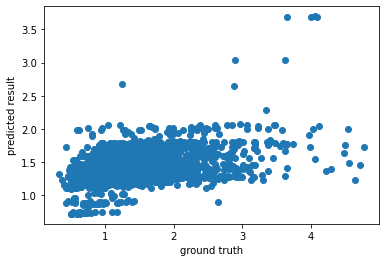

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time

rm_pipe = Pipeline([
    ('columns', ColumnTransformer([
        ('AADT',MinMaxScaler(),['AADT']),
        ('Crack',MinMaxScaler(),['crack']),
        ('time',MinMaxScaler(),['construction_time']),
        ('Year',MinMaxScaler(),['year'])
        
    ])),
    ('model', RandomForestRegressor(max_depth=5,random_state=42,n_estimators=500,max_features=4))
])
start_time = time.time()
rm_pipe.fit(train_x,train_y)
end_time = time.time()
print('training-time:',end_time - start_time)
print('train-MSE:',mean_squared_error(train_y,rm_pipe.predict(train_x)))
print('train-r2:',r2_score(train_y,rm_pipe.predict(train_x)))
print('test-MSE:',mean_squared_error(test_y,rm_pipe.predict(test_x)))
print('test-r2:',r2_score(test_y,rm_pipe.predict(test_x)))

start_time1 = time.time()
rm_pipe.predict(test_x)
end_time1 = time.time()

print('test-time:',end_time1 - start_time1)

plt.scatter(test_y,rm_pipe.predict(test_x))
plt.xlabel('ground truth')
plt.ylabel('predicted result')
# x = [1, 5]  # Choose the range of x values
# y = [1, 5]  # Compute the corresponding y values (same as x)

# plt.plot(x,y,color='red', linestyle='--', label='y = x')

2. KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn_pipe = Pipeline([
    ('columns', ColumnTransformer([
        ('AADT',MinMaxScaler(),['AADT']),
        ('Crack',MinMaxScaler(),['crack']),
        ('time',MinMaxScaler(),['construction_time'])
    ])),
    ('model', KNeighborsRegressor(n_neighbors=5))
])
start_time = time.time()
knn_pipe.fit(train_x,train_y)
end_time = time.time()
print('training-time:',end_time - start_time)
print('train-MSE:',mean_squared_error(train_y,knn_pipe.predict(train_x)))
print('train-r2:',r2_score(train_y,knn_pipe.predict(train_x)))
print('test-MSE:',mean_squared_error(test_y,knn_pipe.predict(test_x)))
print('test-r2:',r2_score(test_y,knn_pipe.predict(test_x)))

start_time1 = time.time()
knn_pipe.predict(test_x)
end_time1 = time.time()

print('test-time:',end_time1 - start_time1)

training-time: 0.02263188362121582
train-MSE: 0.24796569749805406
train-r2: 0.3963816631631839
test-MSE: 0.3873163987369527
test-r2: 0.06253468995972578
test-time: 0.013737916946411133


training-time: 0.022520065307617188
train-MSE: 0.38954422227339147
train-r2: 0.014265659708212919
test-MSE: 0.37379723294742884
test-r2: 0.01703306030349172
test-time: 0.006285905838012695


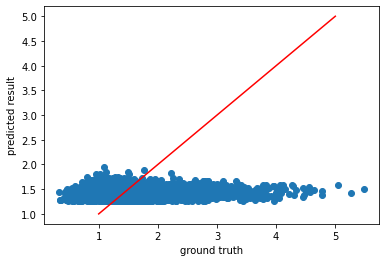

In [25]:
from sklearn.linear_model import LinearRegression
lr_pipe = Pipeline([
    ('columns', ColumnTransformer([
        ('AADT',MinMaxScaler(),['AADT_ALL_VEHIC']),
        ('Crack',MinMaxScaler(),['MEPDG_TRANS_CRACK_LENGTH_AC']),
        ('time',MinMaxScaler(),['construction_time'])
    ])),
    ('model', LinearRegression())
])
start_time = time.time()
lr_pipe.fit(train_x,train_y)
end_time = time.time()
print('training-time:',end_time - start_time)
print('train-MSE:',mean_squared_error(train_y,lr_pipe.predict(train_x)))
print('train-r2:',r2_score(train_y,lr_pipe.predict(train_x)))
print('test-MSE:',mean_squared_error(test_y,lr_pipe.predict(test_x)))
print('test-r2:',r2_score(test_y,lr_pipe.predict(test_x)))

start_time1 = time.time()
lr_pipe.predict(test_x)
end_time1 = time.time()

print('test-time:',end_time1 - start_time1)

plt.scatter(test_y,lr_pipe.predict(test_x))
plt.xlabel('ground truth')
plt.ylabel('predicted result')
x = [1, 5]  # Choose the range of x values
y = [1, 5]  # Compute the corresponding y values (same as x)

plt.plot(x,y,color='red', linestyle='-', label='y = x')

In [8]:
from sklearn.svm import SVR
svr_pipe = Pipeline([
    ('columns', ColumnTransformer([
        ('AADT',MinMaxScaler(),['AADT_ALL_VEHIC']),
        ('Crack',MinMaxScaler(),['MEPDG_TRANS_CRACK_LENGTH_AC']),
        ('time',MinMaxScaler(),['construction_time'])
    ])),
    ('model', SVR(kernel='rbf'))
])
start_time = time.time()
svr_pipe.fit(train_x,train_y)
end_time = time.time()
print('training-time:',end_time - start_time)
print('train-MSE:',mean_squared_error(train_y,svr_pipe.predict(train_x)))
print('train-r2:',r2_score(train_y,svr_pipe.predict(train_x)))
print('test-MSE:',mean_squared_error(test_y,svr_pipe.predict(test_x)))
print('test-r2:',r2_score(test_y,svr_pipe.predict(test_x)))

start_time1 = time.time()
svr_pipe.predict(test_x)
end_time1 = time.time()

print('test-time:',end_time1 - start_time1)

training-time: 21.229165077209473


KeyboardInterrupt: 

In [ ]:
# !pip install xgboost

In [ ]:
import xgboost as xgb
xgb_pipe = Pipeline([
    ('columns', ColumnTransformer([
        ('AADT',MinMaxScaler(),['AADT_ALL_VEHIC']),
        ('Crack',MinMaxScaler(),['MEPDG_TRANS_CRACK_LENGTH_AC']),
        ('time',MinMaxScaler(),['construction_time'])
    ])),
    ('model', xgb.XGBRegressor())
])
start_time = time.time()
xgb_pipe.fit(train_x,train_y)
end_time = time.time()
print('training-time:',end_time - start_time)
print('train-MSE:',mean_squared_error(train_y,xgb_pipe.predict(train_x)))
print('train-r2:',r2_score(train_y,xgb_pipe.predict(train_x)))
print('test-MSE:',mean_squared_error(test_y,xgb_pipe.predict(test_x)))
print('test-r2:',r2_score(test_y,xgb_pipe.predict(test_x)))

start_time1 = time.time()
xgb_pipe.predict(test_x)
end_time1 = time.time()

print('test-time:',end_time1 - start_time1)

training-time: 6.292014837265015
train-MSE: 0.3672083554498266
train-r2: 0.10611145402098932
test-MSE: 0.36950684012645557
test-r2: 0.10564116166842608
test-time: 0.006776094436645508


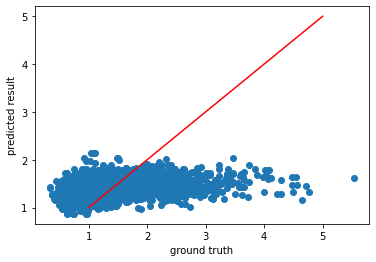

In [56]:

from sklearn.neural_network import MLPRegressor
mlp_pipe = Pipeline([
    ('columns', ColumnTransformer([
        ('AADT',MinMaxScaler(),['AADT']),
        ('Crack',MinMaxScaler(),['crack']),
        ('time',MinMaxScaler(),['construction_time'])
    ])),
    ('model', MLPRegressor(hidden_layer_sizes=(50, 50,50,50,50,50), activation='relu', solver='adam', max_iter=200000,learning_rate_init=0.00001))
])
start_time = time.time()
mlp_pipe.fit(train_x,train_y)
end_time = time.time()
print('training-time:',end_time - start_time)
print('train-MSE:',mean_squared_error(train_y,mlp_pipe.predict(train_x)))
print('train-r2:',r2_score(train_y,mlp_pipe.predict(train_x)))
print('test-MSE:',mean_squared_error(test_y,mlp_pipe.predict(test_x)))
print('test-r2:',r2_score(test_y,mlp_pipe.predict(test_x)))

start_time1 = time.time()
mlp_pipe.predict(test_x)
end_time1 = time.time()

print('test-time:',end_time1 - start_time1)

plt.scatter(test_y,mlp_pipe.predict(test_x))
plt.xlabel('ground truth')
plt.ylabel('predicted result')
x = [1, 5]  # Choose the range of x values
y = [1, 5]  # Compute the corresponding y values (same as x)

plt.plot(x,y,color='red', linestyle='-', label='y = x')